In [107]:
# from transformers import pipeline
# from transformers import BertTokenizer, TFBertModel
# import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelBinarizer
from sklearn.manifold import TSNE
# from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import os
from string import punctuation

In [132]:
datapath = "../data/"
with open(os.path.join(datapath, "challenge4/train.txt"), 'r') as f:
    reviews = f.read()
with open(os.path.join(datapath, "challenge4/test.txt"), 'r') as f:
    reviews_test = f.read()
y_train = pd.read_csv(os.path.join(datapath, "challenge4/train_labels.txt"), names=["y"]).to_numpy()

# Pre processing

In [133]:
reviews = reviews.lower() # lowercase, standardize
all_text = ''.join([c for c in reviews if c not in punctuation])

# split by new lines and spaces
reviews_split = all_text.split('\n')
all_text = ' '.join(reviews_split)

# create a list of words
words = all_text.split()

In [124]:
vectorizer = TfidfVectorizer(max_features=10000, lowercase=True, stop_words= 'english', ngram_range=(1,1))
y_train = LabelBinarizer().fit_transform(y_train)
X_train_vect = vectorizer.fit_transform(words)
X_test_vect = vectorizer.fit_transform(reviews_test)

# Some visualization, although does not work well

In [87]:
X_train_embedded = TSNE(perplexity=20, n_iter=500, learning_rate=50).fit_transform(X_train_vect)

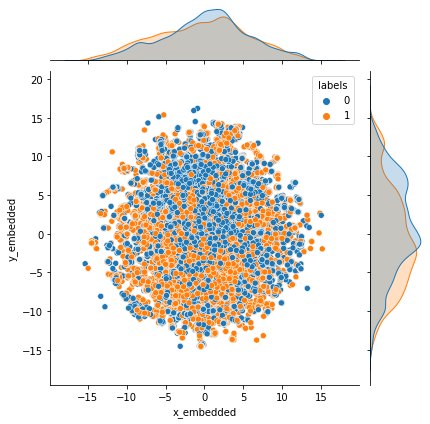

In [88]:
X = pd.DataFrame.from_dict({"x_embedded": X_train_embedded[:, 0], "y_embedded":X_train_embedded[:, 1], "labels": Y_train.T[0]})
X.head()
sns.jointplot(data=X, x="x_embedded", y="y_embedded", hue="labels")

# Prediction with NaiveBaye

In [125]:
nb = GaussianNB()
nb.fit(X_train_vect.toarray(), Y_train)

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [126]:
y_pred = nb.predict(X_test_vect.toarray())

In [127]:
nb.score(X_train_vect.toarray(), Y_train)
y_train_pred = nb.predict(X_train_vect.toarray())

In [128]:
mean_absolute_error(y_train_pred, Y_train)

0.12382857142857143

In [129]:
submission = pd.DataFrame.from_dict({"id":np.arange(len(y_pred)), "testLabels": y_pred})
submission.to_csv("SampleSubmission4.csv", index=False)

In [130]:
submission.shape

(7501, 2)

In [131]:
submission.head()

,id,testLabels
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
